# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Data for the examples

In [2]:
# load the sensors data
sensor_data = pd.read_csv("data/sensors.csv")
sensor_data[:5]

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

# Grouping by a single column's values

In [3]:
# group this data by the sensor column / variable
# returns a DataFrameGroupBy object
grouped_by_sensor = sensor_data.groupby('sensor')
grouped_by_sensor

In [4]:
# get the number of groups that this will create
grouped_by_sensor.ngroups

2

In [5]:
# what are the groups that were found?
grouped_by_sensor.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
             23],
            dtype='int64')}

# Accessing the results of a grouping

In [6]:
# a helper function to print the contents of the groups
def print_groups (group_object):
    # loop over all groups, printing the group name 
    # and group details
    for name, group in group_object:
        print (name)
        print (group[:5])

In [7]:
# examine the content of the groups we created
print_groups(grouped_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [8]:
# get how many items are in each group
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [9]:
# get the count of items in each column of each group
grouped_by_sensor.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [10]:
# get the data in one specific group
grouped_by_sensor.get_group('accel')[:5]

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

In [11]:
# get the first three items in each group
grouped_by_sensor.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [12]:
# get the 2nd item in each group
grouped_by_sensor.nth(1)

            axis  interval  reading
sensor                             
accel          Y         0      0.5
orientation    Y         0      0.1

In [13]:
# get descriptive statistics for each group
grouped_by_sensor.describe()

            interval                ...  reading         \
               count mean       std ...      50%    75%   
sensor                              ...                   
accel           12.0  1.5  1.167748 ...     0.35  0.725   
orientation     12.0  1.5  1.167748 ...     0.10  0.225   

                  
             max  
sensor            
accel        1.0  
orientation  0.4  

[2 rows x 16 columns]

# Grouping using muiltiple columns

In [14]:
# group by both sensor and axis values
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

## Grouping using index levels

In [15]:
# make a copy of the data and reindex the copy
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [16]:
# group by the first level of the index 
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [17]:
# group by multiple levels of the index
print_groups(mi.groupby(level=['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

## Applying aggregation functions to groups

In [18]:
# calculate the mean for each sensor/axis
sensor_axis_grouping = mi.groupby(level=['sensor', 'axis'])
sensor_axis_grouping.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [19]:
# do not create an index matching the original object
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [20]:
# can simply apply the agg function to the group by object
sensor_axis_grouping.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [21]:
# apply multiple aggregation functions at once
sensor_axis_grouping.agg([np.sum, np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [22]:
# apply a different function to each column
sensor_axis_grouping.agg({'interval' : len,
                          'reading': np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [23]:
# calculate the mean of the reading column
sensor_axis_grouping['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

# Transforming groups of data

In [24]:
# a DataFrame to use for examples
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                                'Values': [0, 1, 2, 3, 4],
                                'Values2': [5, 6, 7, 8, 9],
                                'Other': ['foo', 'bar', 'baz', 
                                          'fiz', 'buz']},
                              index = list('VWXYZ'))
transform_data

  Label Other  Values  Values2
V     A   foo       0        5
W     C   bar       1        6
X     B   baz       2        7
Y     A   fiz       3        8
Z     C   buz       4        9

In [25]:
# group by label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label Other  Values  Values2
V     A   foo       0        5
Y     A   fiz       3        8
B
  Label Other  Values  Values2
X     B   baz       2        7
C
  Label Other  Values  Values2
W     C   bar       1        6
Z     C   buz       4        9


In [26]:
# add ten to all values in all columns
grouped_by_label.transform(lambda x: x + 10)

   Values  Values2
V      10       15
W      11       16
X      12       17
Y      13       18
Z      14       19

# Filling missing values with the mean of the group

In [27]:
# data to demonstrate replacement on NaN
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]})
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [28]:
# calculate the mean of the two groups
grouped.mean()

       Values
Label        
A        11.0
B        21.0

In [29]:
# use transform to fill the NaNs with the mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

   Values
0    10.0
1    20.0
2    11.0
3    21.0
4    12.0
5    22.0

# Calculating z-scores

In [30]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 pd.date_range('2013-01-01', periods=365*3))
periods = 100
rolling = data.rolling(
    window=periods,
    min_periods=periods,
    center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

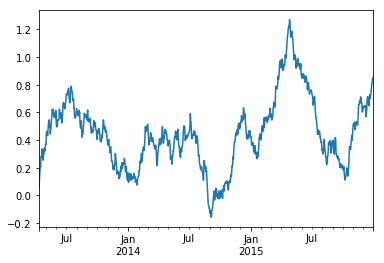

In [31]:
# visualize the series
rolling.plot();

In [32]:
# calculate mean and std by year
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

          mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [33]:
# normalize to the z-score
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

              mean  std
2013 -3.172066e-17  1.0
2014 -1.881296e-15  1.0
2015 -1.492261e-15  1.0

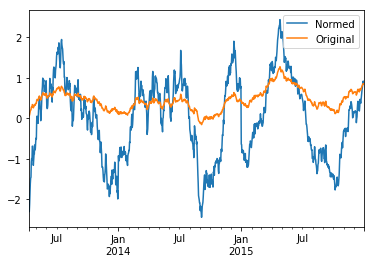

In [34]:
# plot original vs normalize
compared = pd.DataFrame({ 'Original': rolling,
                          'Normed': normed })
compared.plot();

# Filtering groups

In [35]:
# data for our examples
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     C     4.0
4     C     NaN
5     C     8.0

In [36]:
# drop groups with one or fewer non-NaN values
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

In [37]:
# drop any groups with NaN values
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0

In [38]:
# select groups with a mean of 2.0 or greater 
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0